In [44]:
# Loading the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
#loading data set
df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [46]:
#Descriptive Statistics
df.shape

(550068, 12)

In [47]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'Current Column: {col}')
        print(df[col].value_counts())
        print('='*25)
        print('\n')

Current Column: Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64


Current Column: Gender
M    414259
F    135809
Name: Gender, dtype: int64


Current Column: Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Current Column: City_Category
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Current Column: Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64




In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [49]:
# count number of data types 
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [50]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [51]:
#Check for missing values in the data
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

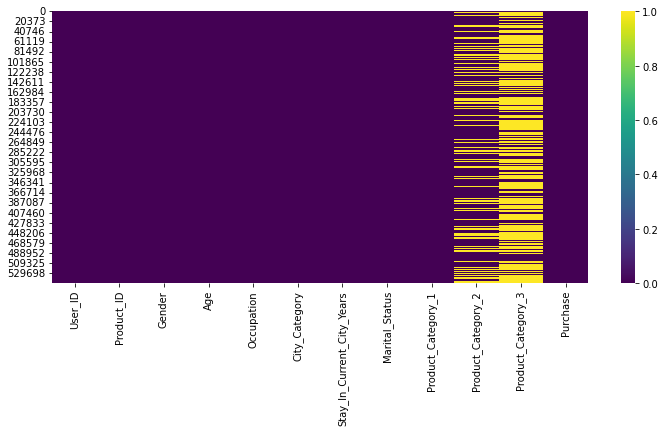

In [52]:
## heatmap
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),cmap='viridis');

In [53]:
# checking for duplicates
df.duplicated().sum()

0

In [54]:
df.columns   

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [55]:
# renaming columns
df.rename(columns={'User_ID':'UserID','Product_ID':'ProductID','Product_Category_1':'Product1','Product_Category_2':'Product2','Product_Category_3':'Product3','Stay_In_Current_City_Years':'City'},inplace=True)
df.head()

,UserID,ProductID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [29]:
#Droping out unnecessary columns:-¶
#Here we are going to drop product 3 coloumn so the visualization and cleaning becomes easy.

In [57]:
df.drop(['ProductID'],inplace=True,axis='columns')

In [58]:
df.head()

,UserID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [61]:
#Cleaning individual columns
df['City'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [62]:
def cities(value):
    if '+' in value:
        value=value.replace('+','')
        return int(value)
    else:
        return int(value)

df['City']=df['City'].apply(cities)

In [66]:
df['City'].unique()

array([2, 4, 3, 1, 0])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UserID          550068 non-null  int64  
 1   Gender          550068 non-null  object 
 2   Age             550068 non-null  object 
 3   Occupation      550068 non-null  int64  
 4   City_Category   550068 non-null  object 
 5   City            550068 non-null  int64  
 6   Marital_Status  550068 non-null  int64  
 7   Product1        550068 non-null  int64  
 8   Product2        376430 non-null  float64
 9   Product3        166821 non-null  float64
 10  Purchase        550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [69]:
df['UserID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [71]:
df['UserID'].dtype

dtype('int64')

In [72]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [74]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [75]:
def ages(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)
df['Age']=df['Age'].apply(ages)

In [76]:
#Over here we have replaced the age groups according to the categories.
#We have replaced numerical data into categorical data.
#The types of categories are: child,adult,teenage and old.
#0-17 -> child
#18-25 -> teenage
#26-35 -> adult
#36-45 -> adult
#46-50 -> adult
#51-55 -> old
#55+ -> old

In [77]:
df['Age'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [78]:
df.head(6)

,UserID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,child,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,child,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,old,16,C,4,0,8,NaN,NaN,7969
5,1000003,M,adult,15,A,3,0,1,2.0,NaN,15227


In [79]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [80]:
df['Occupation'].dtype

dtype('int64')

In [81]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [82]:
df['Marital_Status'].unique()

array([0, 1])

In [83]:
df['Marital_Status'].dtype

dtype('int64')

In [ ]:
#There's nothing to change in this column.
#Here married status -> 1
#Whereas single status -> 0

In [84]:
df[['UserID','Marital_Status']].tail()

,UserID,Marital_Status
550063,1006033,1
550064,1006035,0
550065,1006036,1
550066,1006038,0
550067,1006039,1


In [85]:
df['Product1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [86]:
df['Product1'].dtype

dtype('int64')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UserID          550068 non-null  int64  
 1   Gender          550068 non-null  object 
 2   Age             550068 non-null  object 
 3   Occupation      550068 non-null  int64  
 4   City_Category   550068 non-null  object 
 5   City            550068 non-null  int64  
 6   Marital_Status  550068 non-null  int64  
 7   Product1        550068 non-null  int64  
 8   Product2        376430 non-null  float64
 9   Product3        166821 non-null  float64
 10  Purchase        550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [88]:
df['Product2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product2, dtype: int64

In [89]:
#removing the percentage of null data in product2
(df['Product2'].isnull().sum() / len(df)) * 100

31.56664266963357

In [90]:
#removing the mode of product 2
s=df.groupby('Age')['Product2'].agg(pd.Series.mode)
s

Age
adult      8.0
child      4.0
old        8.0
teenage    8.0
Name: Product2, dtype: float64

In [92]:
for key in s.index:
    df.loc[(df['Age']==key) & (df['Product2'].isnull()), 'Product2']=s[key]

In [93]:
df['Product2'].isnull().sum()

0

In [94]:
df['Product3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product3, dtype: int64

In [95]:
#removing the percentage of null data in product3
(df['Product3'].isnull().sum() / len(df)) * 100

69.67265865311198

In [96]:
#removing the mode of product 2
s=df.groupby('Age')['Product3'].agg(pd.Series.mode)
s

Age
adult      16.0
child      16.0
old        16.0
teenage    16.0
Name: Product3, dtype: float64

In [97]:
for key in s.index:
    df.loc[(df['Age']==key) & (df['Product3'].isnull()), 'Product3']=s[key]

In [98]:
df['Product3'].isnull().sum()

0

In [99]:
#After cleaning checking the data
df.isnull().sum()

UserID            0
Gender            0
Age               0
Occupation        0
City_Category     0
City              0
Marital_Status    0
Product1          0
Product2          0
Product3          0
Purchase          0
dtype: int64

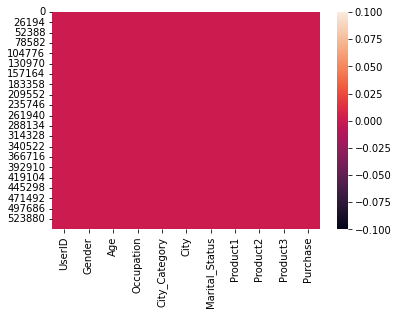

In [101]:
sns.heatmap(df.isnull())
plt.show()
#The heat map shows that there is no null value present in data set

In [ ]:
#Data visualization
#For data visualization we are going to use two python libraries.
#Seaborn
#Matplotlib


<AxesSubplot:title={'center':'Age vs Purchase'}, xlabel='Age', ylabel='Purchase'>

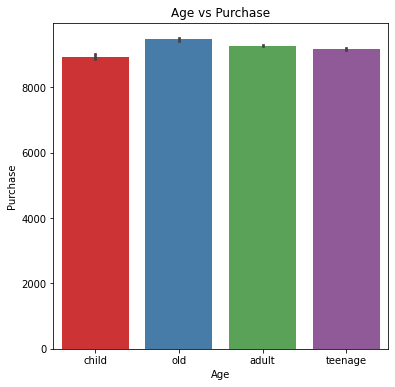

In [102]:
# Age vs purchased
plt.figure(figsize=(6,6))
plt.title('Age vs Purchase')
sns.barplot(x='Age',y='Purchase',data=df,palette='Set1')

In [ ]:
#Here we understood that the purchase rate of old age  ids are highest and the lowest rate is of child.

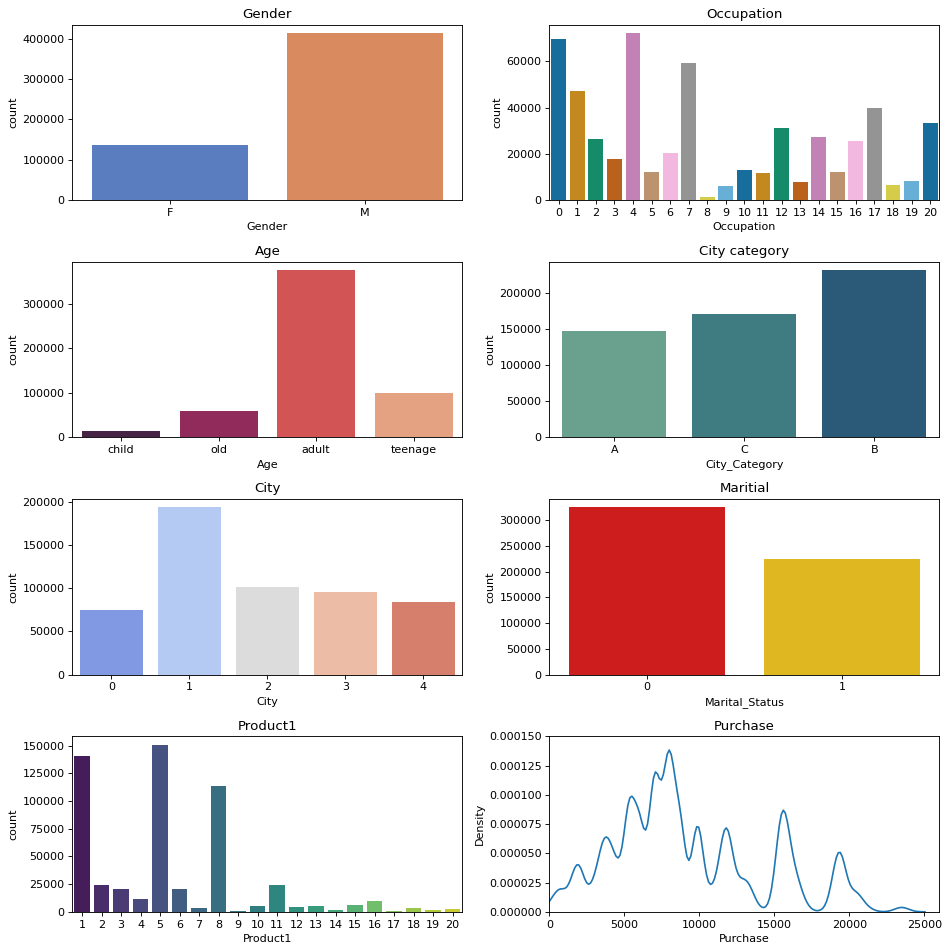

In [108]:
# Visualizing individual column 
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=df,palette='muted')

plt.subplot(4,2,3)
plt.title('Age')
sns.countplot(x='Age',data=df,palette='rocket')

plt.subplot(4,2,2)
plt.title('Occupation')
sns.countplot(df['Occupation'],palette='colorblind')

plt.subplot(4,2,4)
plt.title('City category')
sns.countplot(df['City_Category'],palette='crest')

plt.subplot(4,2,5)
plt.title('City')
sns.countplot(df['City'],palette='coolwarm')

plt.subplot(4,2,6)
plt.title('Maritial')
sns.countplot(df['Marital_Status'],palette='hot')

ax=plt.subplot(4,2,8)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(df['Purchase'])

plt.subplot(4,2,7)
plt.title('Product1')
sns.countplot(df['Product1'],palette='viridis')

plt.tight_layout()
plt.show()

In [ ]:
Gender:-

The graph shows that count of male is more than female.
Male count=4000
Female count=1500
Age:-

The graph shows that pepople visiting the store are maximum adults.
Adult age ranges from 26-50
Where as least visited are children.
Maritial:-

People visting the store are married and has higher count as compared to singles.
Married count = 3,00,000
Single count=2,00,000
Purchase:-

Purchase rate is higher between 5000 - 10,000
Purchase rate goes upto range 25,0000
City category:-

People visiting the store maximum belong to city category B.
Least visiting people visiting the store belong to category A.
City:-

Maximum people visiting the store belong to 1.
Least visited is city 0.
By this we can conclude that the store is located in city 1.

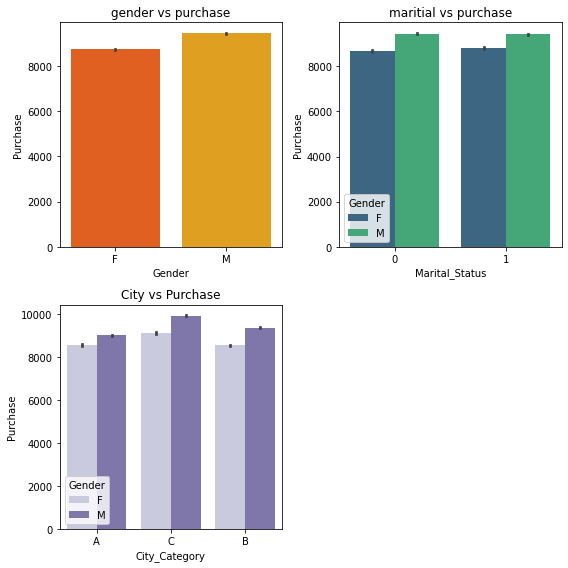

In [109]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('gender vs purchase')
sns.barplot(x='Gender',y='Purchase',data=df,palette='autumn')

plt.subplot(2,2,2)
plt.title('maritial vs purchase')
sns.barplot(x='Marital_Status',y='Purchase',hue='Gender',data=df,palette='viridis')

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(data=df,x='City_Category',y='Purchase',hue='Gender',palette='Purples')

plt.tight_layout()
plt.show()

In [ ]:
#By these 3 ploted graph we conclude that male has higher purchase rate than female
#male > female(purchase)

<AxesSubplot:title={'center':'maritial status vs purchase'}, xlabel='Marital_Status', ylabel='Purchase'>

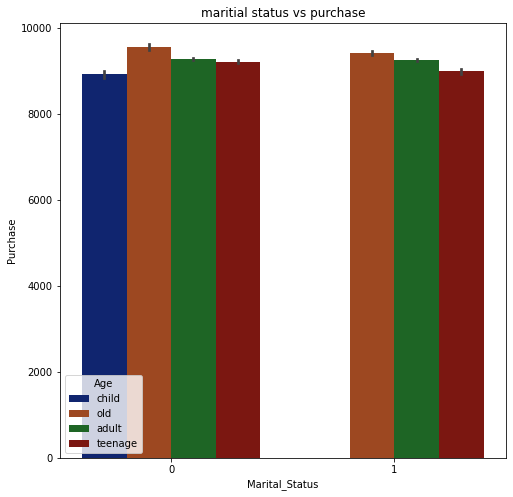

In [110]:
# Plotting purchase vs product1
plt.figure(figsize=(8,8))
plt.title('maritial status vs purchase')
sns.barplot(x='Marital_Status',y='Purchase',data=df,palette='dark',hue='Age')

In [ ]:
This graph we come to know that purchase rate is more in singles rather than in married.
In singles purchase rate of old age is higher where as in married purchase rate of old is higher.

,Age
Age,
adult,375301
child,15102
old,60005
teenage,99660


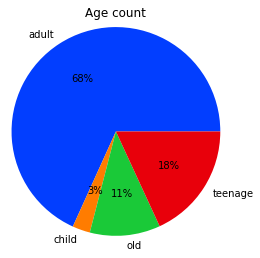

In [111]:
#Age count
x=df.groupby('Age')['Age'].agg('count')
display(x.to_frame())
plt.title('Age count')
palette_color=sns.color_palette('bright')
plt.pie(x, colors=palette_color,labels=x.index,radius=1.2,autopct='%.0f%%')
plt.show()

In [ ]:
Maximum people visiting the store are from adult category.
Least people visiting belong to child category.

,City_Category
City_Category,
A,147720
B,231173
C,171175


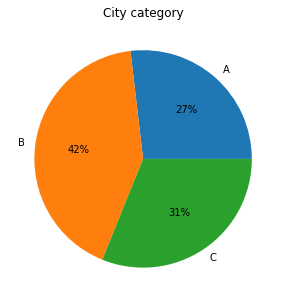

In [113]:
#city category
plt.figure(figsize=(5,5))
plt.title('City category')
palette_color=sns.color_palette('bright')
x=df.groupby('City_Category')['City_Category'].agg('count')
display(x.to_frame())
plt.pie(x,labels=x.index,autopct='%.0f%%')
plt.show()

In [ ]:
People visting the store belong to city category B.
Least visiting belong to city A.

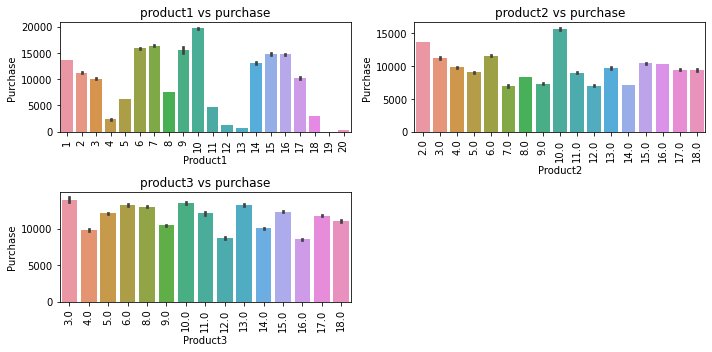

In [115]:
#Plotting products vs purchase rate
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title('product1 vs purchase')
sns.barplot(x='Product1',y='Purchase',data=df)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('product2 vs purchase')
sns.barplot(x='Product2',y='Purchase',data=df)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('product3 vs purchase')
sns.barplot(x='Product3',y='Purchase',data=df)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [ ]:
In this graph of product1 and product2 the 10th product is more purchased.
In product3 3rd product is more purchased compared to all.

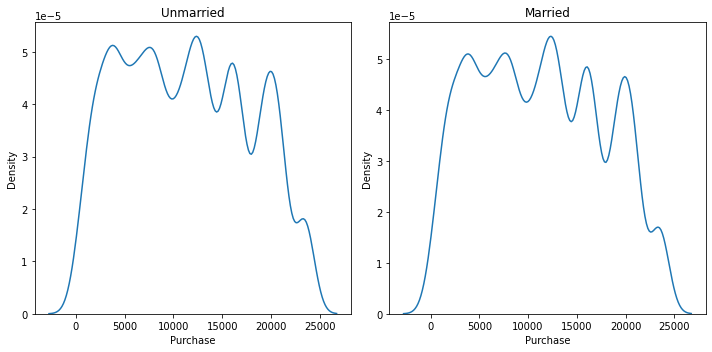

In [116]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
x=df[df['Marital_Status']==0].value_counts('Purchase')
plt.title('Unmarried')
sns.kdeplot('Purchase',data=x)

plt.subplot(1,2,2)
y=df[df['Marital_Status']==1].value_counts('Purchase')
plt.title('Married')
sns.kdeplot('Purchase',data=y)

plt.tight_layout()
plt.show()

In [ ]:
Purchase distribution of both 'Married' and 'UnMarried' customers are quitely same.

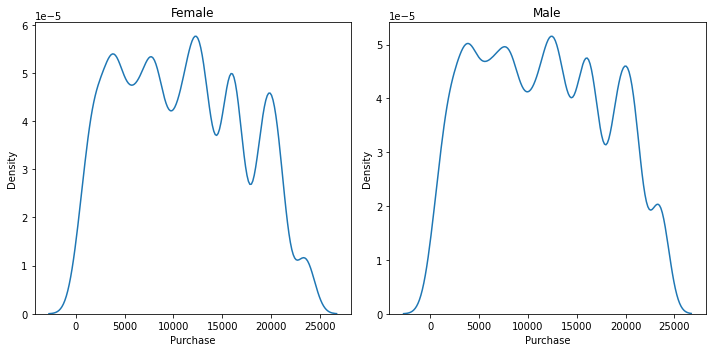

In [117]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
x=df[df['Gender']=='F'].value_counts('Purchase')
plt.title('Female')
sns.kdeplot('Purchase',data=x)

plt.subplot(1,2,2)
y=df[df['Gender']=='M'].value_counts('Purchase')
plt.title('Male')
sns.kdeplot('Purchase',data=y)

plt.tight_layout()
plt.show()

In [ ]:
Purchase distribution of both 'Male' and 'Female' customers are quitely same

In [ ]:
Conclusion:-
In the Given dataset. I explored and learned many things like,
How to fill NaN values. Where we can use the concept of code reusability.
In the process of cleaning the dataset I used Pandas and Numpy libraries. Using pandas and
numpy I removed unwanted(useless) data and created new data frames and got useful data for my research.
After cleaning my data I used Seaborn and Matplotlib libraries to read my data by visualizing it.
I created questions regarding my research I tried to solve it by visualizing and applying conditions.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
By seeing this EDA we can fulfill this requirements.